Uses Dynamic Program to calculate the optimal strategy (when to flip and when to stop and recieve the money).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def game(heads,flips,depth=1000,memo=None):
    '''
    heads: number of flips that landed heads
    flips: total number of flips
    depth: depth of model. maximum 3000 (due to pythons recursion limit)
    memo: dictionary where the key is (heads,flips) and the value is p, the ratio of heads to flips
    returns p, the expected ratio of heads to flips with the best possible strategy, and memo
    '''
    key = (heads,flips)
    n = depth
    if memo is None:
        memo = {}
    if flips == 0:
        p = 0
    else: 
        p = heads/flips
    if key in memo:
        return memo[key],memo
    memo[key] = p
    if flips >= n: #1000 flips total. still very accurate.
        return max(memo[key],0.5),memo #we know we can always reach p = 0.5 with infinite flips.
    else:
        next_tails = max(game(heads,flips+1,n,memo)[0],0.5) #flip tails.
        next_heads = max(game(heads+1,flips+1,n,memo)[0],0.5) #flip heads. 
        memo[(heads,flips+1)] = next_tails
        memo[(heads+1,flips+1)] = next_heads
        if (next_tails+next_heads)/2 > p:
            return (next_tails+next_heads)/2,memo
        else: 
            return p,memo #p multiplied by one million gives the expected value with the optimal strategy.

In [2]:
def heatmap(memo):
    '''
    memo: memo returned from the game() function
    returns a heatmap with the x axis as the number of heads and 
    the y axis as the number of flips. black represents scenarios 
    where the player should not flip again and yellow represents 
    scenarios where the expected value increases with another flip
    '''
    heat = np.zeros([1001,1001])
    for key in memo:
        if key[1] == 0:
            heat[key] = 0
        else:
            if memo[key] > max(key[0]/key[1],0.5): #these scenarios is wh
                heat[key] = memo[key]
            else:
                heat[key] = 0
        if key[1]<key[0]:
            heat[key] = 100
    return plt.imshow(heat,cmap='hot',interpolation='nearest')

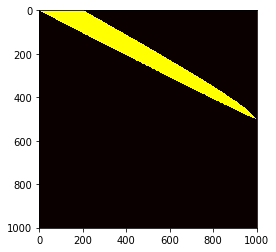

In [3]:
heatmap(game(0,0,depth=1000)[1])